# **Chapter 3. Python 을 활용한 데이터 전처리** 





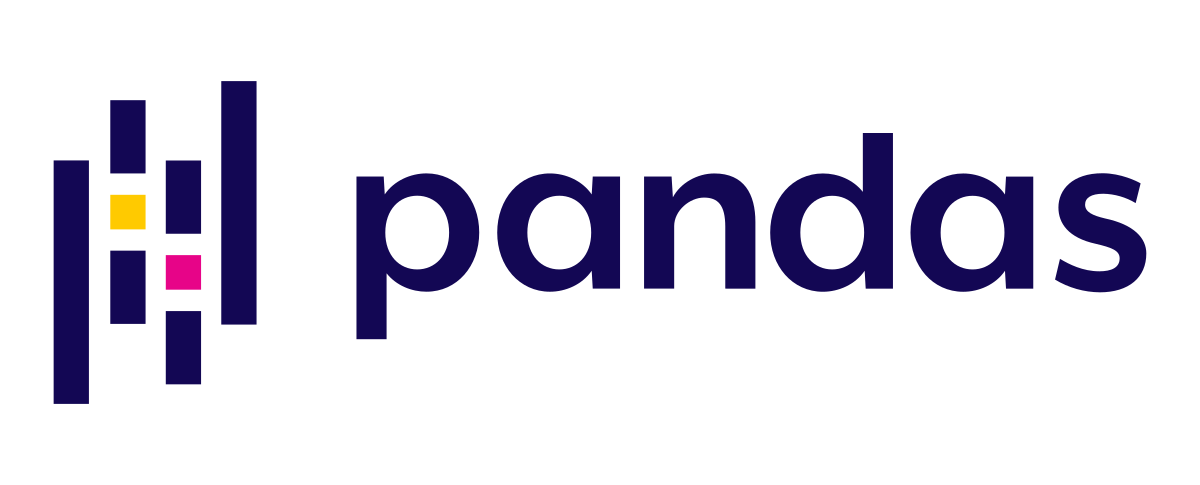


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> **3-14. 실습 예제** <br>

## 3-14. 실습 예제 ✍
> 이번 파트에서는, **앞서 배운 Pandas 의 전처리 기법들을 활용**해서, <br>
> **분석 데이터 수집부터, 전처리, 분석/시각화 A-Z 실습을 진행합니다.**  <br>
> 진행하면서 혹시 익숙하지 않은 부분이 있다면, 앞선 강의를 통한 복습을 권장합니다!

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [1]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [2]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np

# 폰트 설정
# path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
path = "C:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
#fm._rebuild() 예전 버전
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

> ###  **3-14-1. 분석 데이터 수집**


> - 이번 실습에서는 기본적으로 **Pandas 의 크롤링(Crawling) 기능을 활용**해 **K-pop 아이돌 정보 데이터를 수집/분석합니다.**
> - 크롤링 과정에 문제가 있을 경우, **강의자료와 함께 첨부된 .csv 데이터**를 사용하거나, 아래 **다운로드 링크에서 받아서 사용**하셔도 됩니다.
> - 다운로드 1 : [kpop_idols.csv](https://docs.google.com/uc?export=download&id=1-2OsTtqS7Ci3uadVHFsPNbJZBNpevloi)
> - 다운로드 2 : [kpop_boys.csv](https://docs.google.com/uc?export=download&id=10_kZzQM8RCIEBtaOo8gW-BsxcEWwBdhb)
> - 다운로드 3 : [kpop_girls.csv](https://docs.google.com/uc?export=download&id=10xGIkuhyDL6D3H1R_BwUQ1hd5ccq269I)

> **크롤링(Crawling) 데이터 수집**

In [3]:
# 코드를 입력해 주세요
# import requests
# site1 = 'https://dbkpop.com/db/all-k-pop-idols'  # K-pop 아이돌 전체 정보
# site2 = 'https://dbkpop.com/db/k-pop-girlgroups' # K-pop 여자 그룹 정보
# site3 = 'https://dbkpop.com/db/k-pop-boybands'   # K-pop 남자 그룹 정보

# r1 = requests.get(site1)
# r2 = requests.get(site2)
# r3 = requests.get(site3)

# all_df = pd.read_html(r1.text, displayed_only=False)[0]
# all_df.columns = all_df.columns.get_level_values(0)

# girl_df = pd.read_html(r2.text, displayed_only=False)[0]
# girl_df.columns = girl_df.columns.get_level_values(0)

# boy_df = pd.read_html(r3.text, displayed_only=False)[0]
# boy_df.columns = boy_df.columns.get_level_values(0)

In [ ]:
# 저장된 csv 를 사용하는 경우
all_df = pd.read_csv('kpop_idols.csv')
girl_df = pd.read_csv('kpop_girls.csv')
boy_df = pd.read_csv('kpop_boys.csv')

> **데이터 기본 정보 확인**
> - 처음 데이터를 입수하고나면, 가장 먼저 **데이터에 어떤 정보(컬럼)들이 있는지**, **데이터 길이**, **결측값 정보** 등을 확인합니다.

In [5]:
all_df.head()

,Profile,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Second Country,Height,Weight,Birthplace,Other Group,Former Group,Gender,Position,Instagram,Twitter
0,Profile,Taeyeon,Kim Taeyeon,김태연,태연,1989-03-09,SNSD,South Korea,NaN,160,44,Jeonju,"TTS, Oh!GG",NaN,F,"Leader, Main Vocalist",taeyeon_ss,NaN
1,NaN,Sunny,Lee Sunkyu,이순규,써니,1989-05-15,SNSD,South Korea,NaN,158,43,California,NaN,NaN,F,NaN,svnnynight,NaN
2,NaN,Tiffany,Hwang Miyoung,황미영,티파니,1989-08-01,SNSD,South Korea,USA,163,50,San Francisco,TTS,NaN,F,NaN,xolovestephi,NaN
3,NaN,Hyoyeon,Kim Hyoyeon,김효연,효연,1989-09-22,SNSD,South Korea,NaN,158,48,Incheon,NaN,NaN,F,NaN,watasiwahyo,NaN
4,NaN,Yuri,Kwon Yuri,권유리,유리,1989-12-05,SNSD,South Korea,NaN,167,45,Goyang,NaN,NaN,F,NaN,yulyulk,NaN


In [6]:
girl_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,Profile,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,SONE,Yes
1,NaN,KARA,NaN,카라,2007-03-29,DSP,4,5,Kamilia,No
2,NaN,2NE1,NaN,투애니원,2009-05-06,YG,4,4,Blackjack,No
3,Profile,T-ara,NaN,티아라,2009-07-29,MBK,4,6,QUEEN'S,Hiatus
4,Profile,SISTAR,NaN,씨스타,2010-03-06,Starship,4,4,STAR1,No


In [7]:
boy_df.head()

,Profile,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Fanclub Name,Active
0,NaN,BIGBANG,NaN,빅뱅,2006-08-19,YG,4,5,VIP,Yes
1,Profile,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,ELF,Yes
2,NaN,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Cassiopeia,Yes
3,Profile,SHINee,NaN,샤이니,2008-05-25,SM,4,5,Shawol,Yes
4,Profile,EXO,NaN,엑소,2012-04-08,SM,9,12,EXO-L,Yes


In [8]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         412 non-null    object
 1   Stage Name      1594 non-null   object
 2   Full Name       1587 non-null   object
 3   Korean Name     1586 non-null   object
 4   K. Stage Name   1593 non-null   object
 5   Date of Birth   1593 non-null   object
 6   Group           1465 non-null   object
 7   Country         1594 non-null   object
 8   Second Country  54 non-null     object
 9   Height          1594 non-null   int64 
 10  Weight          1594 non-null   int64 
 11  Birthplace      737 non-null    object
 12  Other Group     136 non-null    object
 13  Former Group    231 non-null    object
 14  Gender          1594 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64

In [9]:
girl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       85 non-null     object
 1   Name          191 non-null    object
 2   Short         27 non-null     object
 3   Korean Name   191 non-null    object
 4   Debut         189 non-null    object
 5   Company       191 non-null    object
 6   Members       191 non-null    int64 
 7   Orig. Memb.   191 non-null    int64 
 8   Fanclub Name  52 non-null     object
 9   Active        191 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.0+ KB


In [10]:
boy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Profile       62 non-null     object
 1   Name          187 non-null    object
 2   Short         22 non-null     object
 3   Korean Name   187 non-null    object
 4   Debut         187 non-null    object
 5   Company       186 non-null    object
 6   Members       187 non-null    int64 
 7   Orig. Memb.   187 non-null    int64 
 8   Fanclub Name  68 non-null     object
 9   Active        187 non-null    object
dtypes: int64(2), object(8)
memory usage: 14.7+ KB


> ###  **3-14-2. 데이터 전처리**


> **필요한 컬럼만 가져오기**
> - 데이터크기가 클 경우, 모든 컬럼을 사용하면, 가독성이 떨어짐과 동시에 연산도 느려집니다.

In [11]:
# 사용할 컬럼
all_cols = ['K. Stage Name', 'Date of Birth', 'Group', 'Country', 'Height', 'Gender']
girl_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']
boy_cols = ['Name', 'Short', 'Korean Name', 'Debut', 'Company', 'Members', 'Orig. Memb.', 'Active']

In [12]:
# 컬럼 필터링
all_df = all_df[all_cols]
girl_df = girl_df[girl_cols]
boy_df = boy_df[boy_cols]

In [13]:
all_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender
0,태연,1989-03-09,SNSD,South Korea,160,F
1,써니,1989-05-15,SNSD,South Korea,158,F
2,티파니,1989-08-01,SNSD,South Korea,163,F
3,효연,1989-09-22,SNSD,South Korea,158,F
4,유리,1989-12-05,SNSD,South Korea,167,F
...,...,...,...,...,...,...
1589,리리카,2002-07-02,ILY:1,Japan,162,F
1590,나유,2002-07-23,ILY:1,South Korea,0,F
1591,엘바,2003-05-05,ILY:1,South Korea,0,F
1592,릴리,2002-10-17,NMIXX,Australia,0,F


> **데이터 프레임 합치기 (merge)**
> - 데이터 프레임이 여러개 일 경우에, **공통된 키(컬럼)을 기준으로 데이터를 합칠 수 있습니다.**
> - 실습 데이터 처럼 **공동된 키(컬럼)이 고정되어있지 않은 경우**도 있을 수 있습니다.
> - 이럴 경우, merge 기준이 될 **공통 키를 임의로 만들어** 줍니다. 

In [14]:
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,KARA,NaN,카라,2007-03-29,DSP,4,5,No
2,2NE1,NaN,투애니원,2009-05-06,YG,4,4,No
3,T-ara,NaN,티아라,2009-07-29,MBK,4,6,Hiatus
4,SISTAR,NaN,씨스타,2010-03-06,Starship,4,4,No
...,...,...,...,...,...,...,...,...
186,PRITTI-G,NaN,프리티지,2021-08-31,Enterrobang,6,6,Yes
187,Solia,NaN,쏠리아,2021-08-17,Space,5,5,No
188,bugAboo,NaN,버가부,2021-10-25,A team,6,6,Yes
189,SKYLE,NaN,스카이리,2021-08-04,Good Luck,4,4,Yes


In [15]:
# 결측치 확인
girl_df.isna().sum()

Name             0
Short          164
Korean Name      0
Debut            2
Company          0
Members          0
Orig. Memb.      0
Active           0
dtype: int64

> **1. 공통 키(컬럼) 만들기**

In [16]:
# 결측 값 치환
girl_df['Name'] = girl_df['Name'].fillna('_')
girl_df['Short'] = girl_df['Short'].fillna('_')

In [17]:
# 공통 컬럼(Group) 생성
girl_df['Group'] = girl_df['Name'] + '|' + girl_df['Short']

In [18]:
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,Girls' Generation|SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA|_
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1|_
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara|_
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR|_
...,...,...,...,...,...,...,...,...,...
186,PRITTI-G,_,프리티지,2021-08-31,Enterrobang,6,6,Yes,PRITTI-G|_
187,Solia,_,쏠리아,2021-08-17,Space,5,5,No,Solia|_
188,bugAboo,_,버가부,2021-10-25,A team,6,6,Yes,bugAboo|_
189,SKYLE,_,스카이리,2021-08-04,Good Luck,4,4,Yes,SKYLE|_


In [19]:
all_df['Group']

0        SNSD
1        SNSD
2        SNSD
3        SNSD
4        SNSD
        ...  
1589    ILY:1
1590    ILY:1
1591    ILY:1
1592    NMIXX
1593    NMIXX
Name: Group, Length: 1594, dtype: object

In [20]:
girl_df['Group']

0      Girls' Generation|SNSD
1                      KARA|_
2                      2NE1|_
3                     T-ara|_
4                    SISTAR|_
                ...          
186                PRITTI-G|_
187                   Solia|_
188                 bugAboo|_
189                   SKYLE|_
190                Rumble-G|_
Name: Group, Length: 191, dtype: object

In [21]:
# 공통된 문자열을 키(컬럼)값으로 사용하기 위한 과정
for group_name in all_df['Group']:      # 전체 아이돌 데이터 프레임의 키(컬럼) 값 돌기
    if not pd.isna(group_name):         # 결측값이 아닌 경우에만 아래 과정 수행
        girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체

C:\Users\m11\AppData\Local\Temp\ipykernel_3260\194691674.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\194691674.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\194691674.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  girl_df.loc[girl_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\194691674.py:4: UserWarning: This pattern is interpreted as a regular expression

In [22]:
girl_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes,SNSD
1,KARA,_,카라,2007-03-29,DSP,4,5,No,KARA
2,2NE1,_,투애니원,2009-05-06,YG,4,4,No,2NE1
3,T-ara,_,티아라,2009-07-29,MBK,4,6,Hiatus,T-ara
4,SISTAR,_,씨스타,2010-03-06,Starship,4,4,No,SISTAR
...,...,...,...,...,...,...,...,...,...
186,PRITTI-G,_,프리티지,2021-08-31,Enterrobang,6,6,Yes,PRITTI-G|_
187,Solia,_,쏠리아,2021-08-17,Space,5,5,No,Solia|_
188,bugAboo,_,버가부,2021-10-25,A team,6,6,Yes,bugAboo
189,SKYLE,_,스카이리,2021-08-04,Good Luck,4,4,Yes,SKYLE|_


In [23]:
## boy_df 에도 적용
boy_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,BIGBANG,NaN,빅뱅,2006-08-19,YG,4,5,Yes
1,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,Yes
2,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Yes
3,SHINee,NaN,샤이니,2008-05-25,SM,4,5,Yes
4,EXO,NaN,엑소,2012-04-08,SM,9,12,Yes
...,...,...,...,...,...,...,...,...
182,LUMINOUS,LMN,루미너스,2021-09-09,Barunson,4,4,Yes
183,JUST B,NaN,저스트비,2021-06-30,Bluedot,6,6,Yes
184,EPEX,NaN,이펙스,2021-06-08,C9,8,8,Yes
185,BLITZERS,NaN,블리처스,2021-05-12,Wuzo,7,7,Yes


In [24]:

# 결측치 확인
boy_df.isna().sum()

Name             0
Short          165
Korean Name      0
Debut            0
Company          1
Members          0
Orig. Memb.      0
Active           0
dtype: int64

In [25]:
# 결측 값 치환
boy_df['Name'] = boy_df['Name'].fillna('_')
boy_df['Short'] = boy_df['Short'].fillna('_')

# 공통 컬럼(Group) 생성
boy_df['Group'] = boy_df['Name'] + '|' + boy_df['Short']

# 공통된 문자열을 키(컬럼)값으로 사용하기 위한 과정
for group_name in all_df['Group']:      # 전체 아이돌 데이터 프레임의 키(컬럼) 값 돌기
    if not pd.isna(group_name):         # 결측값이 아닌 경우에만 아래 과정 수행
        boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체

C:\Users\m11\AppData\Local\Temp\ipykernel_3260\868406867.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\868406867.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\868406867.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  boy_df.loc[boy_df['Group'].str.contains(group_name), 'Group'] = group_name   # 겹치는 문자열로 대체
C:\Users\m11\AppData\Local\Temp\ipykernel_3260\868406867.py:11: UserWarning: This pattern is interpreted as a regular expression, 

In [26]:
boy_df

,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Group
0,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes,BIGBANG
1,Super Junior,SJ,슈퍼주니어,2005-11-06,SM,11,12,Yes,Super Junior
2,TVXQ!,TVXQ,동방신기,2003-12-26,SM,2,5,Yes,TVXQ
3,SHINee,_,샤이니,2008-05-25,SM,4,5,Yes,SHINee
4,EXO,_,엑소,2012-04-08,SM,9,12,Yes,EXO
...,...,...,...,...,...,...,...,...,...
182,LUMINOUS,LMN,루미너스,2021-09-09,Barunson,4,4,Yes,LUMINOUS|LMN
183,JUST B,_,저스트비,2021-06-30,Bluedot,6,6,Yes,JUST B
184,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes,EPEX
185,BLITZERS,_,블리처스,2021-05-12,Wuzo,7,7,Yes,BLITZERS


> **2. 데이터 합치기**

In [27]:
# 여자 아이돌 정보 합치기
df1 = pd.merge(all_df, girl_df, how='inner', on='Group')

In [28]:
df1

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,하람,2001-01-13,Billlie,South Korea,161,F,Billlie,_,빌리,NaN,MYSTIC,6,6,Yes
506,츠키,2002-09-21,Billlie,Japan,0,F,Billlie,_,빌리,NaN,MYSTIC,6,6,Yes
507,시윤,2005-02-16,Billlie,South Korea,168,F,Billlie,_,빌리,NaN,MYSTIC,6,6,Yes
508,하루나,2006-01-30,Billlie,Japan,0,F,Billlie,_,빌리,NaN,MYSTIC,6,6,Yes


In [29]:
# 남자 아이돌 정보 합치기
df2 = pd.merge(all_df, boy_df, how='inner', on='Group')

In [30]:
df2

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,탑,1987-11-04,BIGBANG,South Korea,180,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
1,태양,1988-05-18,BIGBANG,South Korea,174,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
2,지드래곤,1988-08-18,BIGBANG,South Korea,177,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
3,대성,1989-04-26,BIGBANG,South Korea,178,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
4,승리,1990-12-12,BIGBANG,South Korea,176,M,BIGBANG,_,빅뱅,2006-08-19,YG,4,5,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,아민,2004-05-22,EPEX,South Korea,175,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
627,백승,2004-10-05,EPEX,South Korea,186,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
628,에이든,2005-01-24,EPEX,South Korea,174,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
629,예왕,2005-03-12,EPEX,South Korea,180,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes


In [31]:
# 행 방향 (axis=0) 데이터 결합
df = pd.concat([df1, df2], axis=0)

In [32]:
df = df.reset_index(drop=True)

In [33]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Name,Short,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,Girls' Generation,SNSD,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,아민,2004-05-22,EPEX,South Korea,175,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
1137,백승,2004-10-05,EPEX,South Korea,186,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
1138,에이든,2005-01-24,EPEX,South Korea,174,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes
1139,예왕,2005-03-12,EPEX,South Korea,180,M,EPEX,_,이펙스,2021-06-08,C9,8,8,Yes


> **3. 불필요 열(column) 제거**

In [34]:
df = df.drop(columns = ['Name', 'Short'])

In [35]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,아민,2004-05-22,EPEX,South Korea,175,M,이펙스,2021-06-08,C9,8,8,Yes
1137,백승,2004-10-05,EPEX,South Korea,186,M,이펙스,2021-06-08,C9,8,8,Yes
1138,에이든,2005-01-24,EPEX,South Korea,174,M,이펙스,2021-06-08,C9,8,8,Yes
1139,예왕,2005-03-12,EPEX,South Korea,180,M,이펙스,2021-06-08,C9,8,8,Yes


> **결측값, 중복 처리**
> - 이제 합쳐진 데이터 프레임에서, 결측값과 중복을 처리하도록 합니다.
> - **데이터의 성격에 따라 결측값과, 중복 처리 방향을 결정**합니다.

In [36]:
df.isna().sum()

K. Stage Name     1
Date of Birth     0
Group             0
Country           0
Height            0
Gender            0
Korean Name       0
Debut            11
Company           0
Members           0
Orig. Memb.       0
Active            0
dtype: int64

In [37]:
# 0값을 NaN 형으로 변환
df = df.replace(0, np.nan)

> **1. 결측값 개수 확인**

In [38]:
# 결측값 개수 확인
# 이름이 결측인 경우 - 행 전체 제거
# 키가 결측인 경우 - 평균값 대체
# 데뷰일이 결측인 경우 - 행 전체 제거
df.isnull().sum()
# df.isna().sum()

K. Stage Name      1
Date of Birth      0
Group              0
Country            0
Height           609
Gender             0
Korean Name        0
Debut             11
Company            0
Members            0
Orig. Memb.        0
Active             0
dtype: int64

> **2. 결측값 처리**

In [39]:
# 이름, 데뷰일이 결측인 경우 - 행 전체 제거
df = df.dropna(subset=['K. Stage Name', 'Debut'])

In [40]:
# 키가 결측인 경우 - 평균값 대체
mean_value = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_value)

In [41]:
df.isnull().sum()

K. Stage Name    0
Date of Birth    0
Group            0
Country          0
Height           0
Gender           0
Korean Name      0
Debut            0
Company          0
Members          0
Orig. Memb.      0
Active           0
dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1140
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   K. Stage Name  1129 non-null   object 
 1   Date of Birth  1129 non-null   object 
 2   Group          1129 non-null   object 
 3   Country        1129 non-null   object 
 4   Height         1129 non-null   float64
 5   Gender         1129 non-null   object 
 6   Korean Name    1129 non-null   object 
 7   Debut          1129 non-null   object 
 8   Company        1129 non-null   object 
 9   Members        1129 non-null   int64  
 10  Orig. Memb.    1129 non-null   int64  
 11  Active         1129 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 114.7+ KB


> **2. 중복 행 확인**

In [43]:
# 중복된 행 찾기
df[df.duplicated()]

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active


In [44]:
# 인덱스 재정렬
df = df.reset_index(drop=True)

In [45]:
df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.0,F,소녀시대,2007-08-05,SM,5,9,Yes
1,써니,1989-05-15,SNSD,South Korea,158.0,F,소녀시대,2007-08-05,SM,5,9,Yes
2,티파니,1989-08-01,SNSD,South Korea,163.0,F,소녀시대,2007-08-05,SM,5,9,Yes
3,효연,1989-09-22,SNSD,South Korea,158.0,F,소녀시대,2007-08-05,SM,5,9,Yes
4,유리,1989-12-05,SNSD,South Korea,167.0,F,소녀시대,2007-08-05,SM,5,9,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
1124,아민,2004-05-22,EPEX,South Korea,175.0,M,이펙스,2021-06-08,C9,8,8,Yes
1125,백승,2004-10-05,EPEX,South Korea,186.0,M,이펙스,2021-06-08,C9,8,8,Yes
1126,에이든,2005-01-24,EPEX,South Korea,174.0,M,이펙스,2021-06-08,C9,8,8,Yes
1127,예왕,2005-03-12,EPEX,South Korea,180.0,M,이펙스,2021-06-08,C9,8,8,Yes


> ###  **3-14-3. 데이터 분석 및 시각화**
> - 보통 데이터 분석을 시작 할 때, **데이터로부터 알고 싶은 정보** 가 있기 마련입니다.
> - 이번 실습에서는 알고싶은 정보는 다음과 같다고 가정해보겠습니다.
    - 1. K-pop 여자/남자 그룹의 비율은 어떻게 될까?
    - 2. 현재 활동 중인 그룹 비율은 얼마나 될까?
    - 3. 그룹 멤버가 늘거나 줄어든 그룹은 얼마나 될까?
    - 4. 데뷔일이 최근일수록 멤버수가 많을까?


> **1. K-pop 여자/남자 그룹의 비율은 어떻게 될까?**

In [46]:
# 아이돌 그룹 당 첫번째 행만 남기기
group_df = df.drop_duplicates(subset=['Group'], keep='first').reset_index(drop=True)

In [47]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes
1,씨엘,1991-02-26,2NE1,South Korea,171.685009,F,투애니원,2009-05-06,YG,4,4,No
2,효린,1990-12-11,SISTAR,South Korea,171.685009,F,씨스타,2010-03-06,Starship,4,4,No
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.685009,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
190,이찬,1997-02-19,DKB,South Korea,178.000000,M,다크비,2020-02-03,Brave,9,9,Yes
191,노아,2000-08-02,T1419,South Korea,171.685009,M,티일사일구,2021-01-11,MLD,9,9,Yes
192,에릭,1979-02-16,Shinhwa,South Korea,180.000000,M,신화,1998-03-24,"SM, Good, Shinhwa",6,6,Yes
193,주한,2001-06-21,BLITZERS,South Korea,171.685009,M,블리처스,2021-05-12,Wuzo,7,7,Yes


<Axes: title={'center': '성별 아이돌 그룹 비율'}, ylabel='count'>

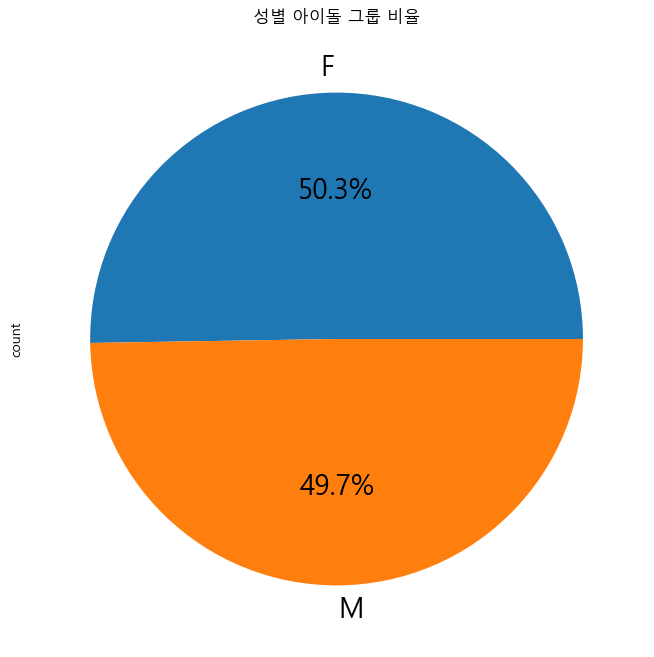

In [48]:
# 성별 아이돌 그룹 비율
gender_df = group_df['Gender'].value_counts()
gender_df.plot(kind='pie', figsize=(15,8), title = '성별 아이돌 그룹 비율', autopct='%.1f%%', fontsize=20)

> **2. 현재 활동중인 아이돌 그룹은 얼마나 될까?**

<Axes: title={'center': '활동중 아이돌 그룹 비율'}, ylabel='count'>

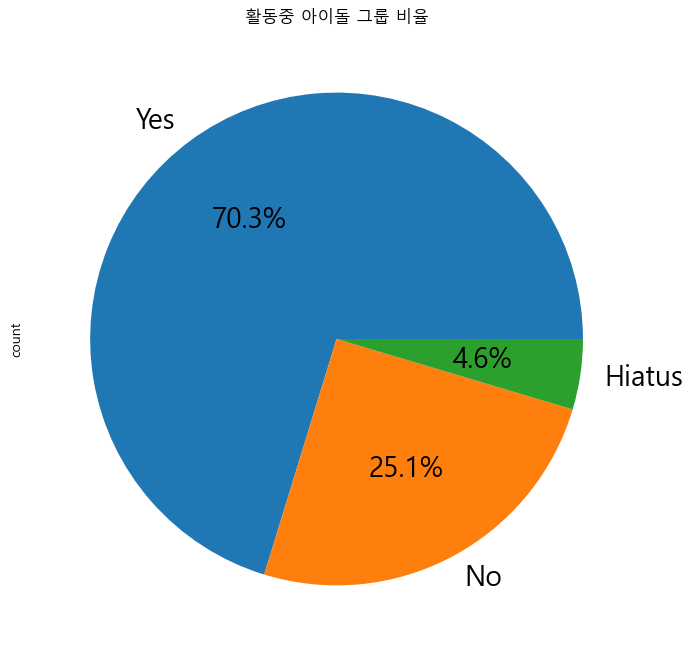

In [49]:
# 활동중 아이돌 그룹 비율
gender_df = group_df['Active'].value_counts()
gender_df.plot(kind='pie', figsize=(15,8), title = '활동중 아이돌 그룹 비율', autopct='%.1f%%', fontsize=20)

> **3. 그룹 멤버수가 늘거나 줄어든 그룹은 얼마나 될까?**

In [50]:
group_df[['Members', 'Orig. Memb.']]

,Members,Orig. Memb.
0,5,9
1,4,4
2,4,4
3,4,5
4,4,4
...,...,...
190,9,9
191,9,9
192,6,6
193,7,7


In [51]:
# 변동 멤버수 컬럼 추가
group_df['Change Memb.'] = group_df['Members'] - group_df['Orig. Memb.']

In [52]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4
1,씨엘,1991-02-26,2NE1,South Korea,171.685009,F,투애니원,2009-05-06,YG,4,4,No,0
2,효린,1990-12-11,SISTAR,South Korea,171.685009,F,씨스타,2010-03-06,Starship,4,4,No,0
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.685009,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,이찬,1997-02-19,DKB,South Korea,178.000000,M,다크비,2020-02-03,Brave,9,9,Yes,0
191,노아,2000-08-02,T1419,South Korea,171.685009,M,티일사일구,2021-01-11,MLD,9,9,Yes,0
192,에릭,1979-02-16,Shinhwa,South Korea,180.000000,M,신화,1998-03-24,"SM, Good, Shinhwa",6,6,Yes,0
193,주한,2001-06-21,BLITZERS,South Korea,171.685009,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0


<Axes: title={'center': '그룹 멤버수 변동 현황'}, ylabel='Frequency'>

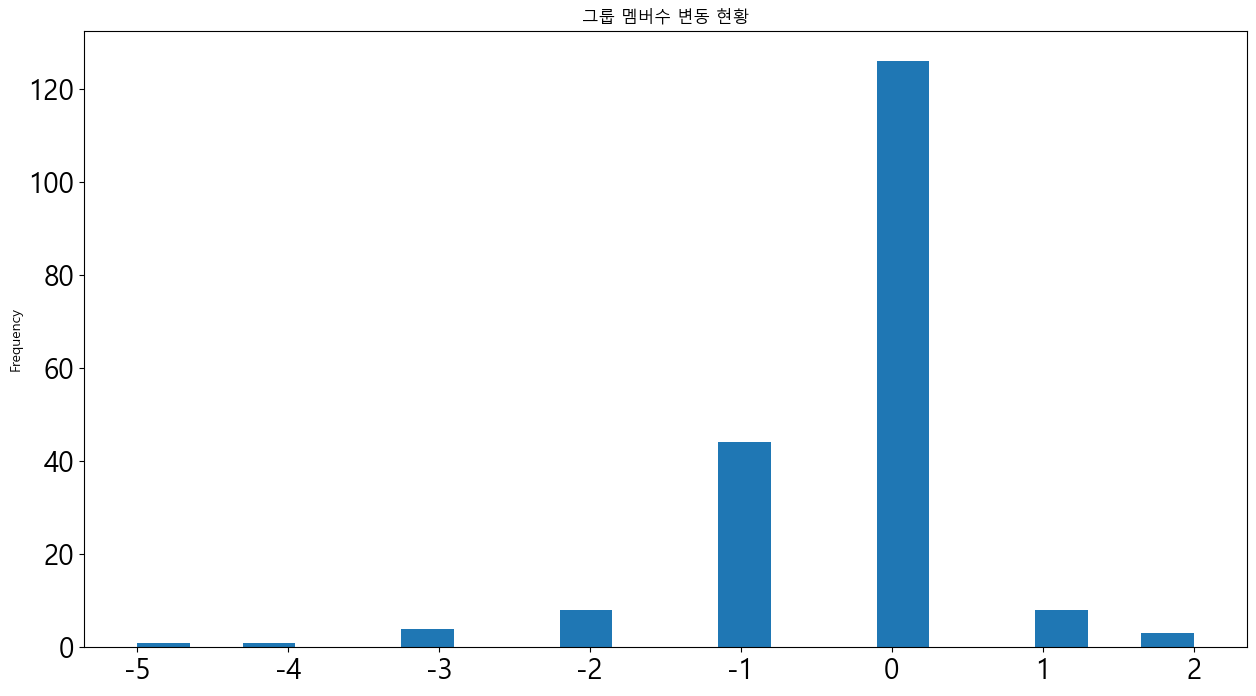

In [53]:
# 변동 멤버수 히스토그램
group_df['Change Memb.'].plot(bins=20, kind='hist', figsize=(15,8), title = '그룹 멤버수 변동 현황', fontsize=20)

> **4. 데뷔일이 최근일수록 멤버수가 많을까?**

In [54]:
# Debut 컬럼 데이트타임(datetime) 자료형으로 변경
group_df['Debut'] = pd.to_datetime(group_df['Debut'])

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: -0001-11-30, at position 45. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [55]:
group_df['Debut'].unique()

array(['2007-08-05', '2009-05-06', '2010-03-06', '2010-07-09',
       '2006-03-02', '2011-04-19', '2012-02-16', '2013-07-11',
       '2007-02-13', '2010-07-01', '2012-10-05', '2015-03-19',
       '2010-08-12', '2015-01-15', '2014-08-01', '2014-05-21',
       '2013-07-20', '2012-08-31', '2016-06-28', '2015-04-21',
       '2014-11-17', '2009-07-29', '2014-06-18', '2016-08-08',
       '2014-08-26', '2009-01-15', '2011-05-16', '2011-04-08',
       '2016-02-25', '2012-07-17', '2014-12-29', '2007-03-29',
       '2017-01-01', '2018-08-03', '2009-10-13', '2017-03-21',
       '2019-11-03', '2012-05-09', '2015-07-14', '2017-08-08',
       '2011-01-03', '2008-02-04', '2013-03-07', '2015-06-25',
       '2013-12-11', '-0001-11-30', '2012-06-23', '2012-02-07',
       '2020-04-10', '2011-08-28', '2012-08-20', '2013-08-07',
       '2017-07-01', '2017-02-09', '2017-06-01', '2017-07-26',
       '2017-08-30', '2016-04-22', '2020-09-22', '2018-01-24',
       '2018-01-16', '2016-03-18', '2018-03-21', '2017

In [56]:
group_df.loc[group_df['Debut']=='-0001-11-30']

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.
45,재경,1988-12-24,Rainbow,South Korea,168.0,F,레인보우,-0001-11-30,DSP,7,7,No,0


In [57]:
# 잘못 입력된 값 변경
group_df['Debut'] = group_df['Debut'].apply(lambda x: '2009-11-04' if x=='-0001-11-30' else x)

In [58]:
group_df.loc[group_df['Debut']=='-0001-11-30']

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.


In [59]:
# Debut 컬럼 데이트타임(datetime) 자료형으로 변경
group_df['Debut'] = pd.to_datetime(group_df['Debut'])

In [60]:
# 데뷔 연도 컬럼 생성
group_df['Debut_Year'] =  group_df['Debut'].dt.year

In [61]:
group_df

,K. Stage Name,Date of Birth,Group,Country,Height,Gender,Korean Name,Debut,Company,Members,Orig. Memb.,Active,Change Memb.,Debut_Year
0,태연,1989-03-09,SNSD,South Korea,160.000000,F,소녀시대,2007-08-05,SM,5,9,Yes,-4,2007
1,씨엘,1991-02-26,2NE1,South Korea,171.685009,F,투애니원,2009-05-06,YG,4,4,No,0,2009
2,효린,1990-12-11,SISTAR,South Korea,171.685009,F,씨스타,2010-03-06,Starship,4,4,No,0,2010
3,소진,1986-05-21,Girl's Day,South Korea,167.000000,F,걸스데이,2010-07-09,DreamT,4,5,Hiatus,-1,2010
4,제아,1981-09-18,Brown Eyed Girls,South Korea,171.685009,F,브라운 아이드 걸스,2006-03-02,Mystic,4,4,Yes,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,이찬,1997-02-19,DKB,South Korea,178.000000,M,다크비,2020-02-03,Brave,9,9,Yes,0,2020
191,노아,2000-08-02,T1419,South Korea,171.685009,M,티일사일구,2021-01-11,MLD,9,9,Yes,0,2021
192,에릭,1979-02-16,Shinhwa,South Korea,180.000000,M,신화,1998-03-24,"SM, Good, Shinhwa",6,6,Yes,0,1998
193,주한,2001-06-21,BLITZERS,South Korea,171.685009,M,블리처스,2021-05-12,Wuzo,7,7,Yes,0,2021


In [62]:
# 데뷔 연도 그룹별 멤버수 평균
member_df = group_df.groupby('Debut_Year')['Members'].mean()
member_df

Debut_Year
1998     6.000000
2003     2.000000
2005    11.000000
2006     4.000000
2007     4.250000
2008     4.500000
2009     4.428571
2010     4.700000
2011     5.125000
2012     4.941176
2013     4.750000
2014     5.250000
2015     6.818182
2016     7.750000
2017     7.571429
2018     7.250000
2019     5.538462
2020     6.153846
2021     7.083333
Name: Members, dtype: float64

<Axes: title={'center': '데뷔연도 별 평균 멤버수 추이'}, xlabel='Debut_Year'>

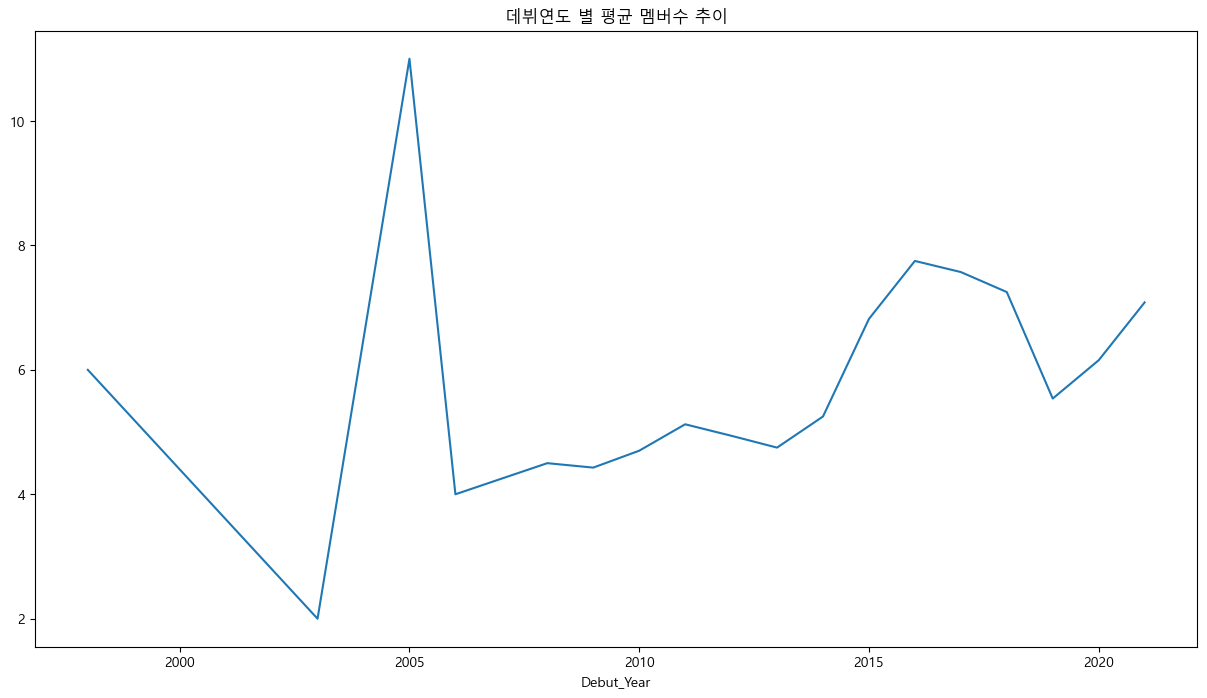

In [63]:
# 데뷔일 기준, 멤버수 추이
member_df.plot(kind='line', x='Debut', y='Members', figsize=(15,8), title='데뷔연도 별 평균 멤버수 추이')